<a href="https://colab.research.google.com/github/vovsiienko/IT496_Course_acitvities/blob/master/IT496_ViktoriiaO_Assignment6_Radar_Chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

#create a dataframe for our alternative analysis matrix
AA=pd.DataFrame(columns=['criteria', 'weight', 'ratingA', 'ratingB', 'ratingC','scoreA', 'scoreB', 'scoreC'])
print(AA)

Empty DataFrame
Columns: [criteria, weight, ratingA, ratingB, ratingC, scoreA, scoreB, scoreC]
Index: []


In [24]:
#first step :add a list of criteria
AA['criteria']=['accuracy', 'efficiency', 'easeOfUse ', 'customerSatisfaction', 'operationalCost']
print(AA)

               criteria weight ratingA ratingB ratingC scoreA scoreB scoreC
0              accuracy    NaN     NaN     NaN     NaN    NaN    NaN    NaN
1            efficiency    NaN     NaN     NaN     NaN    NaN    NaN    NaN
2            easeOfUse     NaN     NaN     NaN     NaN    NaN    NaN    NaN
3  customerSatisfaction    NaN     NaN     NaN     NaN    NaN    NaN    NaN
4       operationalCost    NaN     NaN     NaN     NaN    NaN    NaN    NaN


In [25]:
#second step: identify weights
#weights show relative importance of each criterion
#they must add up to 1 (or 100 if you use percentages)
AA['weight']=[0.25,0.2,0.2,0.2,0.15]
print(AA)

               criteria  weight ratingA ratingB ratingC scoreA scoreB scoreC
0              accuracy    0.25     NaN     NaN     NaN    NaN    NaN    NaN
1            efficiency    0.20     NaN     NaN     NaN    NaN    NaN    NaN
2            easeOfUse     0.20     NaN     NaN     NaN    NaN    NaN    NaN
3  customerSatisfaction    0.20     NaN     NaN     NaN    NaN    NaN    NaN
4       operationalCost    0.15     NaN     NaN     NaN    NaN    NaN    NaN


In [26]:
from pandas.core.indexes.range import RangeIndex
#step 3: rate each alternative across all criteria
#choose a scale: 1-5 or 1-7 or 1-10
#higher number: al alternative is doing better regarding a given criterion

AA['ratingA']=[5,4,5,4,3]
AA['ratingB']=[4,5,4,4,4]
AA['ratingC']=[5,4,4,4,5]
print(AA)

               criteria  weight  ratingA  ratingB  ratingC scoreA scoreB  \
0              accuracy    0.25        5        4        5    NaN    NaN   
1            efficiency    0.20        4        5        4    NaN    NaN   
2            easeOfUse     0.20        5        4        4    NaN    NaN   
3  customerSatisfaction    0.20        4        4        4    NaN    NaN   
4       operationalCost    0.15        3        4        5    NaN    NaN   

  scoreC  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  


In [27]:
#step 4: calculate partial score by multiplying weight * rating
for index, row in AA.iterrows():
  AA['scoreA'][index]=row['ratingA']*row['weight']
  AA['scoreB'][index]=row['ratingB']*row['weight']
  AA['scoreC'][index]=row['ratingC']*row['weight']
print(AA)

               criteria  weight  ratingA  ratingB  ratingC scoreA scoreB  \
0              accuracy    0.25        5        4        5   1.25    1.0   
1            efficiency    0.20        4        5        4    0.8    1.0   
2            easeOfUse     0.20        5        4        4    1.0    0.8   
3  customerSatisfaction    0.20        4        4        4    0.8    0.8   
4       operationalCost    0.15        3        4        5   0.45    0.6   

  scoreC  
0   1.25  
1    0.8  
2    0.8  
3    0.8  
4   0.75  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [28]:
#step 5: add parttial scores to get the total scores
#which solution is the winner? The one with the highest total score

totalScoreA=0
totalScoreB=0
totalScoreC=0

for index,row in AA.iterrows():
  totalScoreA+=row['scoreA']
  totalScoreB+=row['scoreB']
  totalScoreC+=row['scoreC']

print('the total score for A is {:.2f}, for B is {:2f} and for C is {:2f}'.format(totalScoreA, totalScoreB,  totalScoreC))


the total score for A is 4.30, for B is 4.200000 and for C is 4.400000


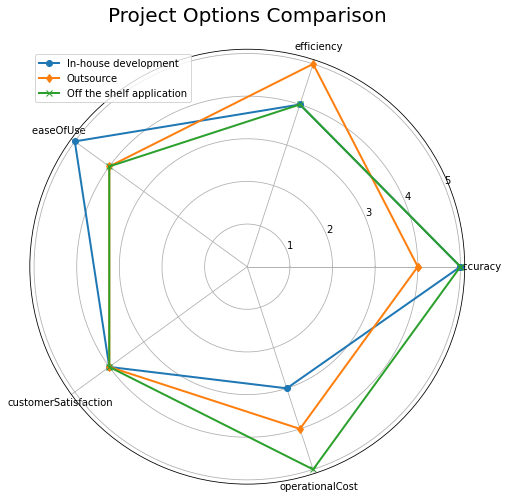

In [34]:
import numpy as np
import matplotlib.pyplot as plt

axisLocations = np.linspace(start=0, stop=2*np.pi, num=len(AA['ratingA']), endpoint=False)
axisLocations = np.concatenate((axisLocations,[axisLocations[0]]))
ratingsA=AA['ratingA']
ratingsB=AA['ratingB']
ratingsC=AA['ratingC']

ratingsACircular=np.concatenate((ratingsA,[ratingsA[0]]))
ratingsBCircular=np.concatenate((ratingsB,[ratingsB[0]]))
ratingsCCircular=np.concatenate((ratingsC,[ratingsC[0]]))

plt.figure(figsize=(8,8))
plt.subplot(polar=True)
plt.plot(axisLocations, ratingsACircular, 'o-', linewidth=2, label="In-house development")
plt.plot(axisLocations, ratingsBCircular, 'd-', linewidth=2, label="Outsource")
plt.plot(axisLocations, ratingsCCircular, 'x-', linewidth=2, label="Off the shelf application")
plt.title('Project Options Comparison', size=20)
lines,labels=plt.thetagrids(np.degrees(axisLocations), labels=AA['criteria'])
plt.legend()
plt.show()